In [1]:
cd ..

/Users/johnphillips/Desktop/DSI/Cycling


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Import pickled clean data:
lap1 = pd.read_pickle('data/lap1.p')
lap2 = pd.read_pickle('data/lap2.p')
lap3 = pd.read_pickle('data/lap3.p')

## Benchmark Modeling

In [5]:
# Let's do a model focused on power.
X = lap3.drop(['power'], axis=1) 

# Make a y based upon Power
y = lap3['power']

In [6]:
# Standard split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

## Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.74


0.2534803228249336


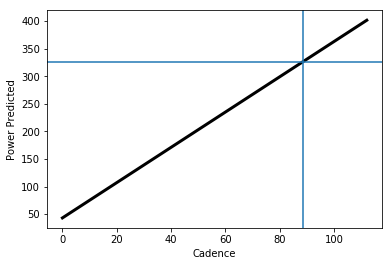

In [8]:
# How predictable is Cadence for Power?
X_cad = lap3['cadence'].values.reshape(-1,1)

# Create the prediction space
prediction_space = np.linspace(min(X_cad), max(X_cad)).reshape(-1,1)

# Fit the model to the data
lr.fit(X_cad, y)

# Compute predictions over the prediction space: y_pred
y_pred = lr.predict(prediction_space)

# Print R^2 
print(lr.score(X_cad, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Cadence')
plt.ylabel('Power Predicted')
plt.axvline(x=(lap3.cadence.mean())) # Mean RPM Line
plt.axhline(y=(lap3.power.mean())) # Mean Power Line
plt.show()

0.17185072639836352


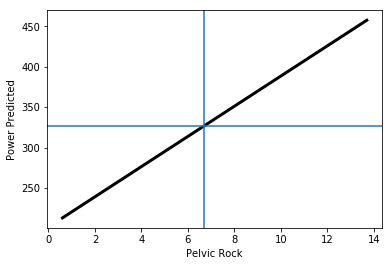

In [9]:
# Can we do the same for Pelvic Rock?
X_rock = lap3['waist_d_rot_z_center'].values.reshape(-1,1)

# Create the prediction space
prediction_space = np.linspace(min(X_rock), max(X_rock)).reshape(-1,1)

# Fit the model to the data
lr.fit(X_rock, y)

# Compute predictions over the prediction space: y_pred
y_pred = lr.predict(prediction_space)

# Print R^2 
print(lr.score(X_rock, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Pelvic Rock')
plt.ylabel('Power Predicted')
plt.axhline(y=(lap3.power.mean())) # Mean Power Line
plt.axvline(x=(lap3['waist_d_rot_z_center'].mean())) # Mean Rock Line
plt.show() 

In [10]:
print 'Mean Lap 3 Power is:', round(lap3.power.mean(), 2)
print 'Mean Lap 3 Pelvic Rock is:', round(lap3['waist_d_rot_z_center'].mean(), 2)

Mean Lap 3 Power is: 326.78
Mean Lap 3 Pelvic Rock is: 6.7


Is 6.7 degrees of Pelvic Rock acceptable?

## Lasso

In [11]:
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train) 
lasso_predict = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.7318358505762697

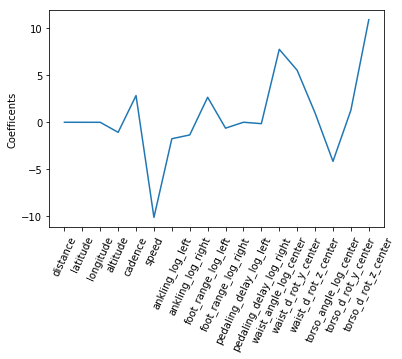

In [12]:
lasso_coef = lasso.fit(X, y).coef_
names = X.columns

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=65)
_ = plt.ylabel('Coefficents')
plt.show()

## Compare Benchmark Models

In [13]:
lin_reg_output = run_benchmark(LinearRegression(), 
                               'linear regression',
                               lap3, 
                               'power')

In [14]:
lasso_output = run_benchmark(Lasso(), 
                           'lasso', 
                           lap3, 'power')

In [15]:
ridge_output = run_benchmark(Ridge(), 
                           'ridge', 
                           lap3, 'power')

In [16]:
enet_output = run_benchmark(ElasticNet(), 
                           'elastic net', 
                           lap3, 'power')

In [17]:
dtree_output = run_benchmark(DecisionTreeRegressor(), 
                             'decision tree',
                             lap3, 'power')

In [18]:
knn_output = run_benchmark(KNeighborsRegressor(), 
                             'knn',
                             lap3, 'power')

In [19]:
output = [
    lin_reg_output,
    lasso_output,
    ridge_output,
    enet_output,
    dtree_output,
    knn_output
]
pd.DataFrame(output)

,model_name,test_score,train_score
0,linear regression,0.7290,0.7724
1,lasso,0.7297,0.7660
2,ridge,0.7848,0.7515
3,elastic net,0.7459,0.7601
4,decision tree,0.5656,1.0000
5,knn,0.7690,0.8613
